In [1]:
# Business Question: To what extent does economic growth reduce extreme poverty across world regions, and how does income inequality influence this relationship?

# Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
sns.set_theme()

# Load the dataset

In [3]:
df = pd.read_csv("pip_dataset.csv")
dfx=df.copy

# Preview the data

In [4]:
# First review of the PIP dataset

In [5]:
df.info() # Basic information on the datafile

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877 entries, 0 to 4876
Columns: 108 entries, country to p50_p10_ratio
dtypes: float64(103), int64(2), object(3)
memory usage: 4.0+ MB


In [6]:
df.shape # Size and shape of the datafile

(4877, 108)

In [7]:
df.describe() # Key information on the datafile. Longitudinal data between 1967 and 2021.

,year,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline,headcount_ratio_100,headcount_ratio_1000,headcount_ratio_2000,...,decile8_thr,decile9_thr,gini,mld,polarization,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
count,4877.000000,4877.000000,4411.000000,4411.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,...,4877.000000,4877.000000,4401.000000,4401.000000,4401.000000,4395.000000,4395.000000,4877.000000,4877.000000,4877.000000
mean,2005.759893,2013.999385,2005.939896,1.639084,11.081565,21.672687,36.538818,3.164721,50.351520,69.105964,...,26.273736,35.110607,0.375645,0.264371,0.327385,1.886528,8.219764,7.424451,2.532256,2.660335
std,9.438782,3.000308,9.497211,1.402898,18.190433,27.104145,33.674140,7.568626,36.002943,34.132391,...,24.171141,30.671393,0.088840,0.140325,0.101136,1.138502,6.018946,42.891943,0.954387,11.785204
min,1967.000000,2011.000000,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.920154,...,1.010000,1.460000,0.177920,0.053563,0.146643,0.596408,2.430173,2.191176,1.475248,1.485294
25%,2000.000000,2011.000000,2000.000000,1.000000,0.278387,0.807877,3.032081,0.044772,10.328433,44.575897,...,8.680000,11.960000,0.308719,0.163090,0.252448,1.154071,4.720943,3.937500,2.017751,1.942113
50%,2007.000000,2011.000000,2007.000000,1.000000,2.041412,9.186717,28.582685,0.371755,55.337658,84.916259,...,16.980000,24.560000,0.355622,0.220968,0.300364,1.465800,6.171947,5.149826,2.290076,2.207904
75%,2013.000000,2017.000000,2014.000000,2.000000,13.390963,34.166712,64.864719,2.158480,85.133887,97.179433,...,35.550000,48.350000,0.427676,0.320859,0.380201,2.152142,9.043292,7.458333,2.780911,2.740385
max,2021.000000,2017.000000,2021.000000,6.000000,96.871427,99.999000,99.999000,79.532619,99.999000,100.000000,...,120.100000,164.700000,0.657556,0.937047,0.815704,8.343586,72.681737,2892.000000,11.491525,809.000000


In [8]:
df.dtypes

country             object
year                 int64
reporting_level     object
welfare_type        object
ppp_version          int64
                    ...   
palma_ratio        float64
s80_s20_ratio      float64
p90_p10_ratio      float64
p90_p50_ratio      float64
p50_p10_ratio      float64
Length: 108, dtype: object

In [9]:
df.columns.tolist()

['country',
 'year',
 'reporting_level',
 'welfare_type',
 'ppp_version',
 'survey_year',
 'survey_comparability',
 'headcount_ratio_international_povline',
 'headcount_ratio_lower_mid_income_povline',
 'headcount_ratio_upper_mid_income_povline',
 'headcount_ratio_100',
 'headcount_ratio_1000',
 'headcount_ratio_2000',
 'headcount_ratio_3000',
 'headcount_ratio_4000',
 'headcount_ratio_40_median',
 'headcount_ratio_50_median',
 'headcount_ratio_60_median',
 'headcount_international_povline',
 'headcount_lower_mid_income_povline',
 'headcount_upper_mid_income_povline',
 'headcount_100',
 'headcount_1000',
 'headcount_2000',
 'headcount_3000',
 'headcount_4000',
 'headcount_40_median',
 'headcount_50_median',
 'headcount_60_median',
 'avg_shortfall_international_povline',
 'avg_shortfall_lower_mid_income_povline',
 'avg_shortfall_upper_mid_income_povline',
 'avg_shortfall_100',
 'avg_shortfall_1000',
 'avg_shortfall_2000',
 'avg_shortfall_3000',
 'avg_shortfall_4000',
 'avg_shortfall_40_

In [10]:
df.head(10)

,country,year,reporting_level,welfare_type,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline,...,decile8_thr,decile9_thr,gini,mld,polarization,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,national,consumption,2011,1996.0,0.0,0.920669,11.174149,44.618417,...,8.85,10.92,0.270103,0.119104,0.241293,0.928335,3.945872,3.568627,1.889273,1.888889
1,Albania,2002,national,consumption,2011,2002.0,1.0,1.570843,14.132118,49.669635,...,8.83,11.58,0.317390,0.164812,0.268982,1.215056,4.831625,3.979381,2.090253,1.903780
2,Albania,2005,national,consumption,2011,2005.0,1.0,0.860527,8.715685,38.545254,...,10.02,12.78,0.305957,0.154413,0.254529,1.142718,4.662236,3.872727,1.978328,1.957576
3,Albania,2008,national,consumption,2011,2008.0,1.0,0.313650,5.250542,31.110345,...,10.74,13.62,0.299847,0.148893,0.247311,1.114657,4.395911,3.574803,1.956897,1.826772
4,Albania,2012,national,consumption,2011,2012.0,1.0,0.849754,6.182414,34.528906,...,10.52,13.26,0.289605,0.138417,0.249988,1.041193,4.272573,3.632877,1.941435,1.871233
5,Albania,2014,national,consumption,2011,2014.0,2.0,1.580897,11.615621,37.033842,...,11.74,15.78,0.345989,0.198662,0.324310,1.376215,5.930924,5.173770,2.296943,2.252459
6,Albania,2015,national,consumption,2011,2015.0,2.0,0.245098,4.690767,24.461185,...,13.80,18.26,0.327537,0.175495,0.300364,1.248506,5.278241,4.599496,2.229548,2.062972
7,Albania,2016,national,consumption,2011,2016.0,2.0,0.410364,5.462612,23.903491,...,14.78,19.18,0.337363,0.187581,0.314380,1.306972,5.626880,4.930591,2.251174,2.190231
8,Albania,2016,national,income,2011,2016.0,4.0,6.681604,17.621649,39.949891,...,11.88,16.02,0.385656,0.273740,0.350360,1.696002,8.286575,6.965217,2.376855,2.930435
9,Albania,2017,national,consumption,2011,2017.0,2.0,0.428475,4.284743,23.828625,...,14.54,18.82,0.330557,0.179908,0.308522,1.259837,5.389502,4.635468,2.229858,2.078818


In [11]:
df.tail()

,country,year,reporting_level,welfare_type,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline,...,decile8_thr,decile9_thr,gini,mld,polarization,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
4872,Zambia,2010,national,consumption,2017,2010.0,4.0,68.456606,82.885088,93.044964,...,3.27,5.34,0.556215,0.539135,0.536149,4.278696,16.024650,10.470588,3.955556,2.647059
4873,Zambia,2015,national,consumption,2017,2015.0,4.0,61.352160,77.548045,90.747141,...,4.02,6.43,0.571361,0.604667,0.613181,4.995829,21.243915,13.978261,4.095541,3.413043
4874,Zimbabwe,2011,national,consumption,2017,2011.0,0.0,21.580063,47.857143,77.945113,...,7.25,10.54,0.431536,0.311153,0.388356,2.207938,8.526847,6.713376,2.773684,2.420382
4875,Zimbabwe,2017,national,consumption,2017,2017.0,0.0,34.206046,61.583570,84.109019,...,5.96,8.81,0.443371,0.322848,0.416694,2.307359,8.569542,6.574627,3.069686,2.141791
4876,Zimbabwe,2019,national,consumption,2017,2019.0,0.0,39.754533,64.509857,85.016315,...,5.76,9.01,0.502565,0.427862,0.463899,NaN,NaN,8.190909,3.400000,2.409091


# Explore the data/initial inspection

In [12]:
# PIP dataset
df_country_year_ppp = df[['country', 'year', 'ppp_version']]
print(df_country_year_ppp)

       country  year  ppp_version
0      Albania  1996         2011
1      Albania  2002         2011
2      Albania  2005         2011
3      Albania  2008         2011
4      Albania  2012         2011
...        ...   ...          ...
4872    Zambia  2010         2017
4873    Zambia  2015         2017
4874  Zimbabwe  2011         2017
4875  Zimbabwe  2017         2017
4876  Zimbabwe  2019         2017

[4877 rows x 3 columns]


In [13]:
# Data cleaning. The This dataset combines 2 sets of data relating to ppp (2011 and 2017). The World Bank and IMF now
# use 2017 PPP for most global comparisons, but they still provide 2011 PPP data for historical # continuity. I will analyse the dataset using the 2017 definition.¶
# We will select only the 2017 data.

In [14]:
df_2017=df.query('(ppp_version>2011)')
df_2017.shape

(2438, 108)

In [15]:
df_2017ppp = df[df['ppp_version'] == 2017].copy()

In [16]:
print(df_2017ppp.shape[0])

2438


In [17]:
df_2017ppp.columns

Index(['country', 'year', 'reporting_level', 'welfare_type', 'ppp_version',
       'survey_year', 'survey_comparability',
       'headcount_ratio_international_povline',
       'headcount_ratio_lower_mid_income_povline',
       'headcount_ratio_upper_mid_income_povline',
       ...
       'decile8_thr', 'decile9_thr', 'gini', 'mld', 'polarization',
       'palma_ratio', 's80_s20_ratio', 'p90_p10_ratio', 'p90_p50_ratio',
       'p50_p10_ratio'],
      dtype='object', length=108)

In [18]:
df_2017ppp['year'].value_counts().sort_index()

year
1967      1
1969      1
1971      1
1974      2
1975      2
1977      3
1978      1
1979      5
1980      4
1981     13
1982      2
1983      6
1984     13
1985     13
1986     17
1987     31
1988     11
1989     21
1990     30
1991     31
1992     46
1993     47
1994     39
1995     54
1996     50
1997     42
1998     60
1999     53
2000     69
2001     54
2002     74
2003     81
2004     93
2005     97
2006     95
2007     89
2008     95
2009     98
2010    102
2011     95
2012    102
2013     94
2014     98
2015    103
2016    102
2017     94
2018    104
2019     75
2020     22
2021      3
Name: count, dtype: int64

In [19]:
df_2017ppp['country'].value_counts().sort_index()

country
Albania      14
Algeria       3
Angola        3
Argentina    32
Armenia      22
             ..
Vietnam      11
World        30
Yemen         3
Zambia        9
Zimbabwe      3
Name: count, Length: 177, dtype: int64

In [20]:
# Checking all data for 2017 ppp-version is present

In [21]:
df_2017ppp.shape

(2438, 108)

# Feature Engineering

In [22]:
#PIP dataset
print(df_2017ppp.columns.tolist())

['country', 'year', 'reporting_level', 'welfare_type', 'ppp_version', 'survey_year', 'survey_comparability', 'headcount_ratio_international_povline', 'headcount_ratio_lower_mid_income_povline', 'headcount_ratio_upper_mid_income_povline', 'headcount_ratio_100', 'headcount_ratio_1000', 'headcount_ratio_2000', 'headcount_ratio_3000', 'headcount_ratio_4000', 'headcount_ratio_40_median', 'headcount_ratio_50_median', 'headcount_ratio_60_median', 'headcount_international_povline', 'headcount_lower_mid_income_povline', 'headcount_upper_mid_income_povline', 'headcount_100', 'headcount_1000', 'headcount_2000', 'headcount_3000', 'headcount_4000', 'headcount_40_median', 'headcount_50_median', 'headcount_60_median', 'avg_shortfall_international_povline', 'avg_shortfall_lower_mid_income_povline', 'avg_shortfall_upper_mid_income_povline', 'avg_shortfall_100', 'avg_shortfall_1000', 'avg_shortfall_2000', 'avg_shortfall_3000', 'avg_shortfall_4000', 'avg_shortfall_40_median', 'avg_shortfall_50_median', '

In [25]:

print(df_2017ppp['country'].unique())

['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominican Republic'
 'East Asia and Pacific' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Eswatini' 'Ethiopia' 'Europe and Central Asia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'High income countries'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kiribati' 'Kosovo' 'Kyrgyzstan' 'Laos'
 'Latin America and the Caribbean' 'Latvia' 'Lebanon' '

In [ ]:
# Now looking at the UK only over the years. PPP version 2017. UK is represented from 1969 to 2017.

In [31]:
df_uk = df[(df['country'] == 'United Kingdom') & (df['ppp_version'] == 2017)].copy()

In [32]:
# Check it worked
print(df_uk.head(35))
print(f"Total rows: {len(df_uk)}")

             country  year reporting_level welfare_type  ppp_version  \
4713  United Kingdom  1969        national       income         2017   
4714  United Kingdom  1974        national       income         2017   
4715  United Kingdom  1979        national       income         2017   
4716  United Kingdom  1986        national       income         2017   
4717  United Kingdom  1991        national       income         2017   
4718  United Kingdom  1994        national       income         2017   
4719  United Kingdom  1995        national       income         2017   
4720  United Kingdom  1996        national       income         2017   
4721  United Kingdom  1997        national       income         2017   
4722  United Kingdom  1998        national       income         2017   
4723  United Kingdom  1999        national       income         2017   
4724  United Kingdom  2000        national       income         2017   
4725  United Kingdom  2001        national       income         

In [33]:
df_uk.describe() # There are 29 years worth of data (1969 to 2017). 

,year,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline,headcount_ratio_100,headcount_ratio_1000,headcount_ratio_2000,...,decile8_thr,decile9_thr,gini,mld,polarization,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
count,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2001.068966,2017.0,2001.068966,1.172414,0.274206,0.429320,1.244726,0.189856,3.230988,19.296541,...,59.623448,78.044828,0.346163,0.210224,0.291570,1.404984,5.846388,4.632603,2.157248,2.145839
std,12.244331,0.0,12.244331,0.889180,0.157464,0.212240,1.329556,0.104606,4.549129,14.029254,...,12.813876,16.851734,0.022049,0.026930,0.015737,0.162109,0.595973,0.351389,0.088715,0.113673
min,1969.000000,2017.0,1969.000000,0.000000,0.147457,0.232232,0.496717,0.000000,1.136496,9.330806,...,24.280000,32.450000,0.284272,0.138387,0.243326,0.998219,4.187465,3.548387,1.957295,1.812903
25%,1996.000000,2017.0,1996.000000,0.000000,0.210262,0.248532,0.747507,0.123451,1.524942,11.239419,...,54.200000,71.600000,0.336724,0.194304,0.287129,1.309206,5.493567,4.456408,2.096814,2.121608
50%,2003.000000,2017.0,2003.000000,1.000000,0.245557,0.384337,0.904171,0.224436,1.833994,12.994686,...,65.050000,85.250000,0.347796,0.212561,0.290031,1.410265,5.984637,4.709870,2.163031,2.164804
75%,2010.000000,2017.0,2010.000000,2.000000,0.248532,0.498546,1.062365,0.246627,2.675477,21.245291,...,66.750000,88.050000,0.357352,0.223115,0.302305,1.483609,6.179679,4.874302,2.230894,2.207006
max,2017.000000,2017.0,2017.000000,2.000000,0.992884,1.235589,7.732084,0.490926,25.490830,71.245051,...,74.900000,96.800000,0.396101,0.275555,0.316390,1.826245,7.066084,5.142741,2.331178,2.279910


In [ ]:
# let's explore whether UK inequality has changed over time. Lets use survey_year. The real year the survey was conducted

In [ ]:
# Gini Index 1969 - 2017

In [74]:
import pandas as pd

def analyze_gini_changes(df, start_year=1969, end_year=2017, data_points=29):
    """
    Analyze Gini index changes between start_year and end_year.
    
    Calculates:
    - Start value
    - End value
    - Absolute change
    - Relative change (%)
    - Mean increase per interval (based on number of observations)
    - Compound Annual Growth Rate (CAGR) across full year span
    """
    intervals = data_points - 1  # number of gaps between observations
    years = end_year - start_year  # full calendar span
    
    # Extract start and end values
    gini_start = df.loc[df["survey_year"] == start_year, "gini"].values[0]
    gini_end   = df.loc[df["survey_year"] == end_year, "gini"].values[0]
    
    # Calculate changes
    abs_change = gini_end - gini_start
    rel_change = (abs_change / gini_start) * 100 if gini_start != 0 else None
    mean_increase = abs_change / intervals
    cagr = (gini_end / gini_start) ** (1/years) - 1 if gini_start != 0 else None
    
    # Return results neatly
    results = {
        "Start (1969)": gini_start,
        "End (2017)": gini_end,
        "Absolute Change": abs_change,
        "Relative Change (%)": rel_change,
        "Mean Increase per Interval": mean_increase,
        "CAGR (Annualized Growth Rate)": cagr
    }
    
    return results

# Example usage
results_gini = analyze_gini_changes(df_uk)
print(results_gini)



{'Start (1969)': 0.3367242529264065, 'End (2017)': 0.3514883070472958, 'Absolute Change': 0.01476405412088927, 'Relative Change (%)': 4.3846126296450825, 'Mean Increase per Interval': 0.0005272876471746167, 'CAGR (Annualized Growth Rate)': 0.000894401613638518}


In [ ]:
## Which years are worst using Gini

In [83]:
# Find the year with the maximum Gini
worst_year = df_uk.loc[df_uk["gini"].idxmax(), ["survey_year", "gini"]]

# Find the year with the minimum Gini
best_year = df_uk.loc[df_uk["gini"].idxmin(), ["survey_year", "gini"]]

print("Worst year (highest inequality):", worst_year)
print("Best year (lowest inequality):", best_year)

# If you want the top 5 worst years
top5_worst = df_uk.nlargest(5, "gini")[["survey_year", "gini"]]
print("Top 5 worst years:\n", top5_worst)


Worst year (highest inequality): survey_year      2000.0
gini           0.396101
Name: 4724, dtype: object
Best year (lowest inequality): survey_year      1979.0
gini           0.284272
Name: 4715, dtype: object
Top 5 worst years:
       survey_year      gini
4724       2000.0  0.396101
4725       2001.0  0.379034
4723       1999.0  0.367838
4722       1998.0  0.366215
4728       2004.0  0.360015


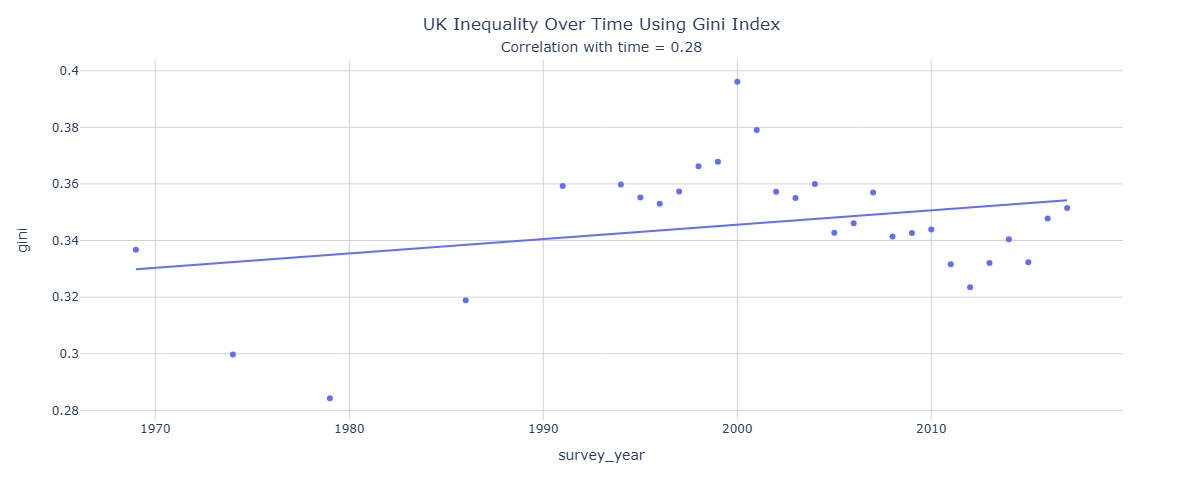

In [76]:
fig = px.scatter(
    df_uk, 
    x="survey_year", 
    y="gini", 
    trendline="ols", 
    width=600, 
    height=500,
    hover_data=["survey_year"]
)

fig.update_layout(
    title=dict(
        text="UK Inequality Over Time Using Gini Index<br><span style='font-size:14px;'>Correlation with time = 0.28</span>",
        x=0.5,
        xanchor='center'
    ),
    plot_bgcolor="white",  # sets background to white
    xaxis=dict(
        showgrid=True,
        gridcolor="lightgrey"  # grid lines visible on x-axis
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="lightgrey"  # grid lines visible on y-axis
    )
)

fig.show()



In [ ]:
#Gini Index
correlation = df_uk['survey_year'].corr(df_uk['gini'])
print("Correlation:", round(correlation, 2))


In [ ]:
# Palma ratio

In [72]:
start_year = 1969
end_year = 2017
data_points = 29
intervals = data_points - 1  # 28 intervals

# Extract start and end values
palma_start = df_uk.loc[df_uk["survey_year"] == start_year, "palma_ratio"].values[0]
palma_end   = df_uk.loc[df_uk["survey_year"] == end_year, "palma_ratio"].values[0]

# Calculate changes
palma_change_abs = palma_end - palma_start
palma_change_pct = (palma_change_abs / palma_start) * 100

# Mean increase per interval
palma_mean_increase = palma_change_abs / intervals

print("Palma ratio change:", palma_change_abs, f"({palma_change_pct:.2f}%)")
print("Mean increase per interval:", palma_mean_increase)


Palma ratio change: 0.12028955779593486 (9.19%)
Mean increase per interval: 0.004296055635569103


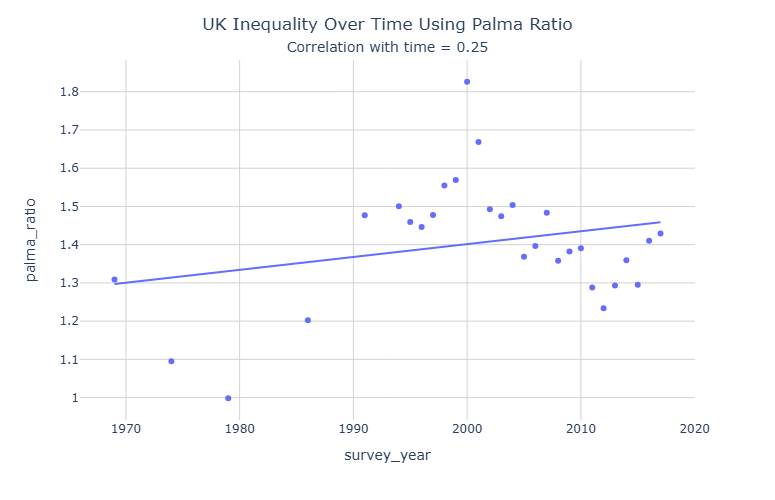

In [78]:
fig = px.scatter(
    df_uk, 
    x="survey_year", 
    y="palma_ratio", 
    trendline="ols", 
    width=600, 
    height=500,
    hover_data=["survey_year"]
)

fig.update_layout(
    title=dict(
        text="UK Inequality Over Time Using Palma Ratio<br><span style='font-size:14px;'>Correlation with time = 0.25</span>",
        x=0.5,
        xanchor='center'
    ),
    plot_bgcolor="white",  # white background
    xaxis=dict(
        showgrid=True,
        gridcolor="lightgrey"  # x-axis grid lines
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="lightgrey"  # y-axis grid lines
    )
)

fig.show()


In [35]:
#Palma Index
correlation = df_uk['survey_year'].corr(df_uk['palma_ratio'])
print("Correlation:", round(correlation, 2))


Correlation: 0.25


In [ ]:
# Palma - worst 5 years

In [85]:
# Find the year with the maximum Palma
worst_year = df_uk.loc[df_uk["palma_ratio"].idxmax(), ["survey_year", "palma_ratio"]]

# Find the year with the minimum Palma
best_year = df_uk.loc[df_uk["palma_ratio"].idxmin(), ["survey_year", "palma_ratio"]]

print("Worst year (highest inequality):", worst_year)
print("Best year (lowest inequality):", best_year)

# If you want the top 5 worst years
top5_worst = df_uk.nlargest(5, "palma_ratio")[["survey_year", "palma_ratio"]]
print("Top 5 worst years:\n", top5_worst)


Worst year (highest inequality): survey_year      2000.0
palma_ratio    1.826245
Name: 4724, dtype: object
Best year (lowest inequality): survey_year      1979.0
palma_ratio    0.998219
Name: 4715, dtype: object
Top 5 worst years:
       survey_year  palma_ratio
4724       2000.0     1.826245
4725       2001.0     1.668897
4723       1999.0     1.569107
4722       1998.0     1.554713
4728       2004.0     1.504119


In [ ]:
# Now compare palma ratio with gini.
# Gini Coefficient: Measures overall income inequality across the entire population. 
# It's sensitive to changes in the middle of the income distribution.
# Palma Ratio: Focuses specifically on the ratio of income share of the richest 10% 
# to the poorest 40%. It emphasizes inequality at the extremes (the "tails").

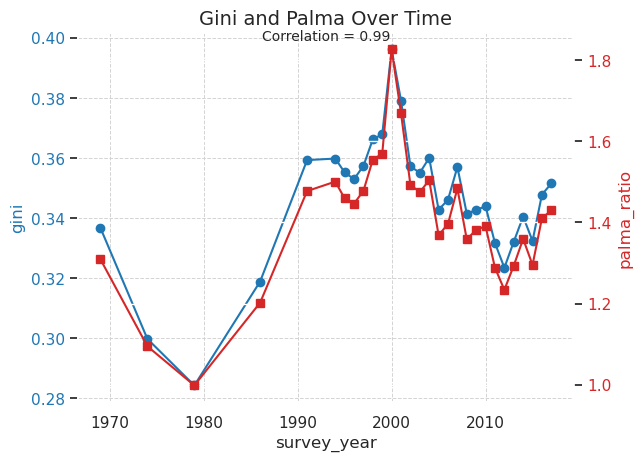

In [40]:
fig, ax1 = plt.subplots()

# Set background to white
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

# Primary axis for Gini
ax1.set_xlabel('survey_year')
ax1.set_ylabel('gini', color='tab:blue')
ax1.plot(df_uk['survey_year'], df_uk['gini'], color='tab:blue', marker='o', label='Gini')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary axis for Palma
ax2 = ax1.twinx()
ax2.set_facecolor('white')
ax2.set_ylabel('palma_ratio', color='tab:red')
ax2.plot(df_uk['survey_year'], df_uk['palma_ratio'], color='tab:red', marker='s', label='Palma')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and correlation text
plt.title('Gini and Palma Over Time', fontsize=14)
corr = df_uk['gini'].corr(df_uk['palma_ratio'])
plt.text(0.5, 0.98, f'Correlation = {corr:.2f}', fontsize=10, ha='center', transform=ax1.transAxes)

# Add grid with light gray lines
ax1.grid(True, color='lightgray', linestyle='--', linewidth=0.7)

plt.show()




In [37]:
correlation = df_uk['palma_ratio'].corr(df_uk['gini'])
print("Correlation:", round(correlation, 2))


Correlation: 0.99


In [80]:
# Polarization: The polarization index, also known as the Wolfson polarization index, measures the extent to which the distribution of income or expenditure is â€œspread outâ€ and bi-modal. Like the Gini coefficient, the polarization index ranges from 0 (no polarization) to 1 (complete polarization). The polarization index is based on Wolfson (1994) and Ravallion and Chen (1997).
# See Wolfson, Michael C. 1994. â€œWhen Inequalities Diverge.â€ The American Economic Review 84 (2): 353â€“58. https://www.jstor.org/stable/2117858 and Ravallion, Martin, and Shaohua Chen. 1997. â€œWhat Can New Survey Data Tell Us about Recent Changes in Distribution and Poverty?â€ The World Bank Economic Review 11 (2): 357â€“82. https://www.jstor.org/stable/3990232.

correlation = df_uk['survey_year'].corr(df_uk['polarization'])
print("Correlation:", round(correlation, 2))

Correlation: 0.25


In [ ]:
# Polarization over time calculation 

In [81]:
# Assume df_uk has columns 'survey_year' and 'polarization'
start_year = 1969
end_year = 2017
data_points = 29
intervals = data_points - 1  # 28 intervals

# Extract start and end values
polarization_start = df_uk.loc[df_uk["survey_year"] == start_year, "polarization"].values[0]
polarization_end   = df_uk.loc[df_uk["survey_year"] == end_year, "polarization"].values[0]

# Calculate changes
polarization_change_abs = polarization_end - polarization_start
polarization_change_pct = (polarization_change_abs / polarization_start) * 100

# Mean increase per interval
polarization_mean_increase = polarization_change_abs / intervals

print("Polarization change:", polarization_change_abs, f"({polarization_change_pct:.2f}%)")
print("Mean increase per interval:", polarization_mean_increase)



Polarization change: -0.00047363940234845803 (-0.16%)
Mean increase per interval: -1.6915692941016358e-05


In [ ]:
## Polarization 5 worst years

In [86]:
# Find the year with the maximum Polarization
worst_year = df_uk.loc[df_uk["polarization"].idxmax(), ["survey_year", "polarization"]]

# Find the year with the minimum Polarization
best_year = df_uk.loc[df_uk["polarization"].idxmin(), ["survey_year", "polarization"]]

print("Worst year (highest polarization):", worst_year)
print("Best year (lowest polarization):", best_year)

# If you want the top 5 worst years
top5_worst = df_uk.nlargest(5, "polarization")[["survey_year", "polarization"]]
print("Top 5 worst years:\n", top5_worst)



Worst year (highest polarization): survey_year      1991.0
polarization    0.31639
Name: 4717, dtype: object
Best year (lowest polarization): survey_year       1979.0
polarization    0.243326
Name: 4715, dtype: object
Top 5 worst years:
       survey_year  polarization
4717       1991.0      0.316390
4724       2000.0      0.308899
4723       1999.0      0.307056
4722       1998.0      0.306932
4718       1994.0      0.305781


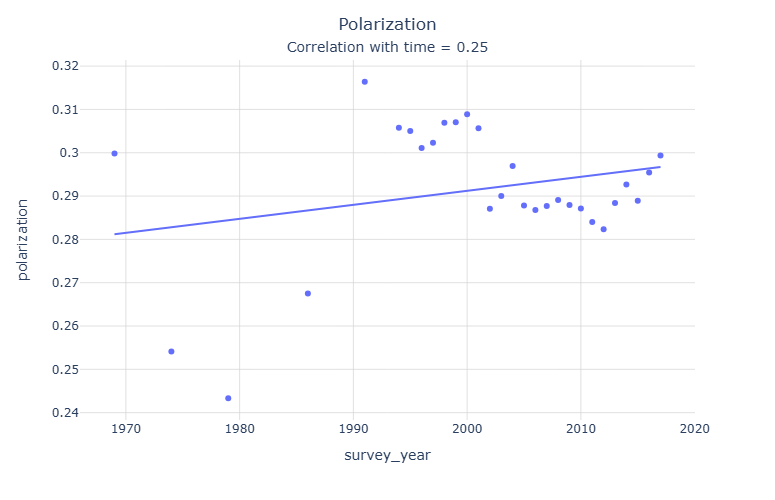

In [79]:
# Polarization ratio
fig = px.scatter(
    df_uk, 
    x="survey_year", 
    y="polarization", 
    trendline="ols", 
    width=600, 
    height=500,
    hover_data=["survey_year"]
)

fig.update_layout(
    title=dict(
        text="Polarization<br><span style='font-size:14px;'>Correlation with time = 0.25</span>",
        x=0.5,
        xanchor='center'
    ),
    # White background
    plot_bgcolor="white",
    paper_bgcolor="white",
    # Grid styling
    xaxis=dict(
        showgrid=True,
        gridcolor="lightgray",
        gridwidth=0.7
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="lightgray",
        gridwidth=0.7
    )
)

fig.show()


In [ ]:
#mld The mean log deviation (MLD) is a measure of inequality. An MLD of zero indicates perfect inequality and it takes on larger positive values as incomes become more unequal. The measure is also referred to as 'Theil L' or 'GE(0)', in reference to the wider families of inequality measures to which the MLD belongs.

correlation = df_uk['survey_year'].corr(df_uk['mld'])
print("Correlation:", round(correlation, 2))

In [ ]:
# MLD change over time

In [82]:
start_year = 1969
end_year = 2017
data_points = 29
intervals = data_points - 1  # 28 intervals

# Extract start and end values
mld_start = df_uk.loc[df_uk["survey_year"] == start_year, "mld"].values[0]
mld_end   = df_uk.loc[df_uk["survey_year"] == end_year, "mld"].values[0]

# Calculate changes
mld_change_abs = mld_end - mld_start
mld_change_pct = (mld_change_abs / mld_start) * 100

# Mean increase per interval
mld_mean_increase = mld_change_abs / intervals

print("MLD change:", mld_change_abs, f"({mld_change_pct:.2f}%)")
print("Mean increase per interval:", mld_mean_increase)


MLD change: 0.033758408959668224 (18.05%)
Mean increase per interval: 0.0012056574628452937


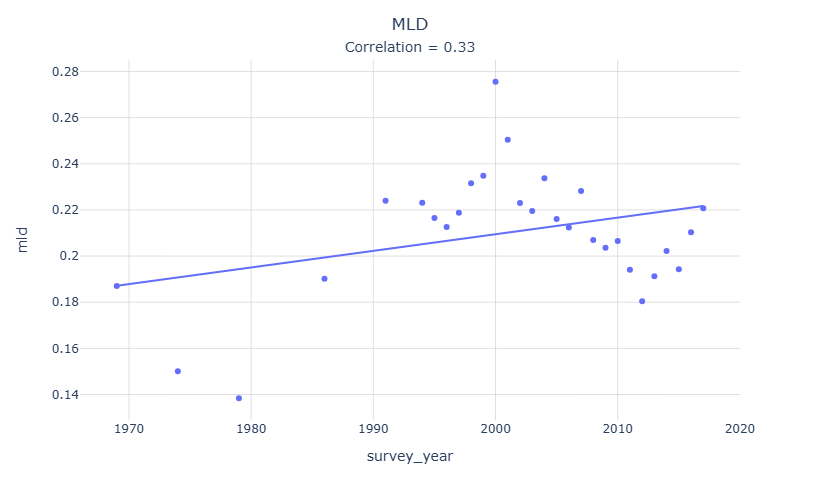

In [44]:
# Mld
fig = px.scatter(
    df_uk, 
    x="survey_year", 
    y="mld", 
    trendline="ols", 
    width=600, 
    height=500,
    hover_data=["survey_year"]
)

fig.update_layout(
    title=dict(
        text="MLD<br><span style='font-size:14px;'>Correlation = 0.33</span>",
        x=0.5,
        xanchor='center'
    ),
    # White background
    plot_bgcolor="white",
    paper_bgcolor="white",
    # Grid styling
    xaxis=dict(
        showgrid=True,
        gridcolor="lightgray",
        gridwidth=0.7
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="lightgray",
        gridwidth=0.7
    )
)

fig.show()


In [41]:
corr_matrix = df_uk.corr(numeric_only=True).round(2)
high_corr = corr_matrix[corr_matrix > 0.85]
print(high_corr)



                                       year  ppp_version  survey_year  \
year                                    1.0          NaN          1.0   
ppp_version                             NaN          NaN          NaN   
survey_year                             1.0          NaN          1.0   
survey_comparability                    NaN          NaN          NaN   
headcount_ratio_international_povline   NaN          NaN          NaN   
...                                     ...          ...          ...   
palma_ratio                             NaN          NaN          NaN   
s80_s20_ratio                           NaN          NaN          NaN   
p90_p10_ratio                           NaN          NaN          NaN   
p90_p50_ratio                           NaN          NaN          NaN   
p50_p10_ratio                           NaN          NaN          NaN   

                                       survey_comparability  \
year                                                    NaN 

In [87]:
# Find the year with the maximum MLD
worst_year = df_uk.loc[df_uk["mld"].idxmax(), ["survey_year", "mld"]]

# Find the year with the minimum MLD
best_year = df_uk.loc[df_uk["mld"].idxmin(), ["survey_year", "mld"]]

print("Worst year (highest inequality):", worst_year)
print("Best year (lowest inequality):", best_year)

# If you want the top 5 worst years
top5_worst = df_uk.nlargest(5, "mld")[["survey_year", "mld"]]
print("Top 5 worst years:\n", top5_worst)


Worst year (highest inequality): survey_year      2000.0
mld            0.275555
Name: 4724, dtype: object
Best year (lowest inequality): survey_year      1979.0
mld            0.138387
Name: 4715, dtype: object
Top 5 worst years:
       survey_year       mld
4724       2000.0  0.275555
4725       2001.0  0.250428
4723       1999.0  0.234840
4728       2004.0  0.233724
4722       1998.0  0.231576


In [ ]:
# Look at the greatest shifts over time

In [ ]:
# Income gap ratio. which one of the 3 increased the most in the UK between 1968 and 2017

In [64]:
# Define start and end years
start_year = 1969
end_year = 2017

# Extract start and end values for each series
intl_start = df_uk.loc[df_uk["survey_year"] == start_year, "income_gap_ratio_international_povline"].values[0]
intl_end   = df_uk.loc[df_uk["survey_year"] == end_year, "income_gap_ratio_international_povline"].values[0]

lower_start = df_uk.loc[df_uk["survey_year"] == start_year, "income_gap_ratio_lower_mid_income_povline"].values[0]
lower_end   = df_uk.loc[df_uk["survey_year"] == end_year, "income_gap_ratio_lower_mid_income_povline"].values[0]

upper_start = df_uk.loc[df_uk["survey_year"] == start_year, "income_gap_ratio_upper_mid_income_povline"].values[0]
upper_end   = df_uk.loc[df_uk["survey_year"] == end_year, "income_gap_ratio_upper_mid_income_povline"].values[0]

# Calculate absolute and relative changes
intl_change_abs = intl_end - intl_start
intl_change_pct = (intl_change_abs / intl_start) * 100

lower_change_abs = lower_end - lower_start
lower_change_pct = (lower_change_abs / lower_start) * 100

upper_change_abs = upper_end - upper_start
upper_change_pct = (upper_change_abs / upper_start) * 100

# Print results
print("International povline change:", intl_change_abs, f"({intl_change_pct:.2f}%)")
print("Lower mid income change:", lower_change_abs, f"({lower_change_pct:.2f}%)")
print("Upper mid income change:", upper_change_abs, f"({upper_change_pct:.2f}%)")

# Identify which increased the most
changes = {
    "International povline": intl_change_abs,
    "Lower mid income": lower_change_abs,
    "Upper mid income": upper_change_abs
}
max_series = max(changes, key=changes.get)
print("Series with largest increase:", max_series)


International povline change: 7.039152456533664 (13.09%)
Lower mid income change: 12.781693847495411 (28.83%)
Upper mid income change: 26.27422721514519 (119.80%)
Series with largest increase: Upper mid income


In [ ]:
df_uk["survey_year"] = pd.to_numeric(df_uk["survey_year"], errors="coerce").astype("Int64")
df_uk["survey_year"] = df_uk["survey_year"].astype(int)

# Now melt the data
df_long = df_uk.melt(
    id_vars="survey_year",
    value_vars=[
        "income_gap_ratio_international_povline",
        "income_gap_ratio_lower_mid_income_povline",
        "income_gap_ratio_upper_mid_income_povline"
    ],
    var_name="poverty_line",
    value_name="income_gap_ratio"
)
df_long["income_gap_ratio"] = df_long["income_gap_ratio"] / 100
# Plot
fig = px.line(
    df_long,
    x="survey_year",
    y="income_gap_ratio",
    color="poverty_line",
    markers=True,
    labels={
        "survey_year": "Survey Year",
        "income_gap_ratio": "Income Gap Ratio",
        "poverty_line": "Poverty Line Version"
    },
    title="UK Income Gap Ratio by World Bank Poverty Line (1969–2017)",
    width=1000,
    height=600
)

fig.update_layout(
    title=dict(
        text="UK Income Gap Ratio by World Bank Poverty Line (1969–2017)",
        x=0.5  # Center the title
    ),
    template="plotly_white",
    yaxis=dict(
        tickformat=".0%",
        range=[0, 1]
    ),
    hovermode="x unified",
    xaxis=dict(
        title="Year",
        tickmode="linear",
        dtick=5
    )
)



fig.show()



In [ ]:
# headcount-internatioanl povline

In [ ]:
# look at data - see cahange over time between 1968 and 2017

In [65]:
# Define start and end years
start_year = 1969
end_year = 2017

# Extract start and end values for each headcount ratio
intl_start = df_uk.loc[df_uk["survey_year"] == start_year, "headcount_ratio_international_povline"].values[0]
intl_end   = df_uk.loc[df_uk["survey_year"] == end_year, "headcount_ratio_international_povline"].values[0]

lower_start = df_uk.loc[df_uk["survey_year"] == start_year, "headcount_ratio_lower_mid_income_povline"].values[0]
lower_end   = df_uk.loc[df_uk["survey_year"] == end_year, "headcount_ratio_lower_mid_income_povline"].values[0]

upper_start = df_uk.loc[df_uk["survey_year"] == start_year, "headcount_ratio_upper_mid_income_povline"].values[0]
upper_end   = df_uk.loc[df_uk["survey_year"] == end_year, "headcount_ratio_upper_mid_income_povline"].values[0]

# Calculate absolute and relative changes
intl_change_abs = intl_end - intl_start
intl_change_pct = (intl_change_abs / intl_start) * 100

lower_change_abs = lower_end - lower_start
lower_change_pct = (lower_change_abs / lower_start) * 100

upper_change_abs = upper_end - upper_start
upper_change_pct = (upper_change_abs / upper_start) * 100

# Print results
print("International povline change:", intl_change_abs, f"({intl_change_pct:.2f}%)")
print("Lower mid income povline change:", lower_change_abs, f"({lower_change_pct:.2f}%)")
print("Upper mid income povline change:", upper_change_abs, f"({upper_change_pct:.2f}%)")

# Identify which increased the most
changes = {
    "International povline": intl_change_abs,
    "Lower mid income povline": lower_change_abs,
    "Upper mid income povline": upper_change_abs
}
max_series = max(changes, key=changes.get)
print("Series with largest increase:", max_series)


International povline change: 0.0772609223846901 (32.97%)
Lower mid income povline change: -0.011513761080970075 (-2.32%)
Upper mid income povline change: -6.73298955387411 (-87.08%)
Series with largest increase: International povline


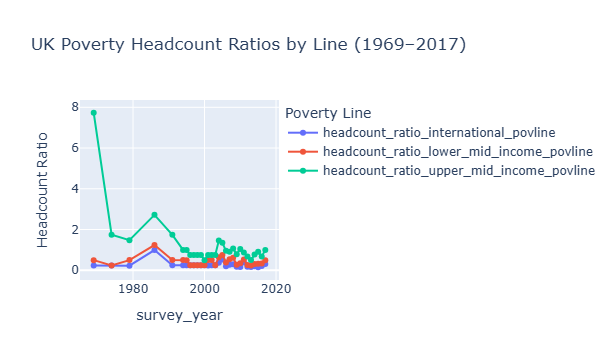

In [66]:
fig = px.line(
    df_uk,
    x="survey_year",
    y=[
        "headcount_ratio_international_povline",
        "headcount_ratio_lower_mid_income_povline",
        "headcount_ratio_upper_mid_income_povline"
    ],
    markers=True,
    labels={"value": "Headcount Ratio", "variable": "Poverty Line"},
    title="UK Poverty Headcount Ratios by Line (1969–2017)"
)

fig.show()


In [ ]:
df_uk["survey_year"] = pd.to_numeric(df_uk["survey_year"], errors="coerce").astype("Int64")
df_uk["survey_year"] = df_uk["survey_year"].astype(int)
df_long_filtered = df_long[df_long["headcount_income_povline"] <= 0.08] # one velue is an outlier for 1969

# Now melt the data
df_long_filtered = df_uk.melt(
    id_vars="survey_year",
    value_vars=[
        "headcount_ratio_international_povline",
        "headcount_ratio_lower_mid_income_povline",
        "headcount_ratio_upper_mid_income_povline"
    ],
    var_name="poverty_line",
    value_name="headcount_income_povline"
)
df_long_filtered["headcount_income_povline"] = df_long_filtered["headcount_income_povline"] / 1000

# Plot
fig = px.line(
    df_long,
    x="survey_year",
    y="headcount_income_povline",
    color="poverty_line",
    markers=True,
    labels={
        "survey_year": "Survey Year",
        "headcount_income_povline": "Headcount Income Poverty line",
        "poverty_line": "Poverty Line Version"
    },
    title="UK Poverty Headcount Ratio by World Bank Poverty Line (1969–2017)",
    width=1000,
    height=600
)

fig.update_layout(
    title=dict(
        text="UK Poverty Headcount Ratio by World Bank Poverty Line (1969–2017)",
        x=0.5  # Center the title
    ),
    template="plotly_white",
    yaxis=dict(
        tickformat=".1%",     
        range=[0, 0.01],      
        tickmode="linear",
        dtick=0.001            
    ),
    hovermode="x unified",
    xaxis=dict(
        title="Year",
        tickmode="linear",
        dtick=5
    )
)


fig.show()


In [ ]:
# avg_shortfall_international_povline
# avg_shortfall_lower_mid_income_povline
# avg_shortfall_upper_mid_income_povline


In [ ]:
# Comparison over time for avg_shortfall

In [67]:
# Define start and end years
start_year = 1969
end_year = 2017

# Extract start and end values for each shortfall series
intl_start = df_uk.loc[df_uk["survey_year"] == start_year, "avg_shortfall_international_povline"].values[0]
intl_end   = df_uk.loc[df_uk["survey_year"] == end_year, "avg_shortfall_international_povline"].values[0]

lower_start = df_uk.loc[df_uk["survey_year"] == start_year, "avg_shortfall_lower_mid_income_povline"].values[0]
lower_end   = df_uk.loc[df_uk["survey_year"] == end_year, "avg_shortfall_lower_mid_income_povline"].values[0]

upper_start = df_uk.loc[df_uk["survey_year"] == start_year, "avg_shortfall_upper_mid_income_povline"].values[0]
upper_end   = df_uk.loc[df_uk["survey_year"] == end_year, "avg_shortfall_upper_mid_income_povline"].values[0]

# Calculate absolute and relative changes
intl_change_abs = intl_end - intl_start
intl_change_pct = (intl_change_abs / intl_start) * 100

lower_change_abs = lower_end - lower_start
lower_change_pct = (lower_change_abs / lower_start) * 100

upper_change_abs = upper_end - upper_start
upper_change_pct = (upper_change_abs / upper_start) * 100

# Print results
print("International povline shortfall change:", intl_change_abs, f"({intl_change_pct:.2f}%)")
print("Lower mid income shortfall change:", lower_change_abs, f"({lower_change_pct:.2f}%)")
print("Upper mid income shortfall change:", upper_change_abs, f"({upper_change_pct:.2f}%)")

# Identify which increased the most
changes = {
    "International povline shortfall": intl_change_abs,
    "Lower mid income shortfall": lower_change_abs,
    "Upper mid income shortfall": upper_change_abs
}
max_series = max(changes, key=changes.get)
print("Series with largest increase:", max_series)


International povline shortfall change: 0.15134177781547353 (13.09%)
Lower mid income shortfall change: 0.4665318254335822 (28.83%)
Upper mid income shortfall change: 1.7997845642374455 (119.80%)
Series with largest increase: Upper mid income shortfall


In [ ]:
# Ensure survey_year is numeric
df_uk["survey_year"] = pd.to_numeric(df_uk["survey_year"], errors="coerce").astype("Int64")
df_uk["survey_year"] = df_uk["survey_year"].astype(int)

# Melt the data
df_long_filtered = df_uk.melt(
    id_vars="survey_year",
    value_vars=[
        "avg_shortfall_international_povline",
        "avg_shortfall_lower_mid_income_povline",
        "avg_shortfall_upper_mid_income_povline"
    ],
    var_name="poverty_line",
    value_name="avg_shortfall_povline"
)

# Scale and cap values
df_long_filtered["avg_shortfall_povline"] = df_long_filtered["avg_shortfall_povline"] / 100

# Plot using the filtered/melted data
fig = px.line(
    df_long_filtered,
    x="survey_year",
    y="avg_shortfall_povline",
    color="poverty_line",
    markers=True,
    labels={
        "survey_year": "Survey Year",
        "avg_shortfall_povline": "Average Shortfall (scaled)",
        "poverty_line": "Poverty Line Version"
    },
    title="UK Average Income Shortfall by World Bank Poverty Line (1969–2017)",
    width=1000,
    height=600
)

fig.update_layout(
    title=dict(
        text="UK Average Income Shortfall by World Bank Poverty Line (1969–2017)",
        x=0.5
    ),
    template="plotly_white",
    yaxis=dict(
        tickformat=".1%",     
        range=[0, 0.05],       
        tickmode="linear",
        dtick=0.005
    ),
    hovermode="x unified",
    xaxis=dict(
        title="Year",
        tickmode="linear",
        dtick=5
    )
)

fig.show()



In [ ]:
# Poverty Gap Index
# "The poverty gap index calculated at the International Poverty Line: $1.90 a day (in 2011 prices) or $2.15 a day (in 2017 prices).
# The poverty gap index is a measure that reflects both the depth and prevalence of poverty. It is defined as the mean shortfall of the total population from the poverty line counting the non-poor as having zero shortfall and expressed as a percentage of the poverty line. 
# It is worth unpacking that definition a little. For those below the poverty line, the shortfall corresponds to the amount of money required in order to reach the poverty line. For those at or above the poverty line, the shortfall is counted as zero. The average shortfall is then calculated across the total population â€“ both poor and non-poor â€“ and then expressed as a share of the poverty line.
# Unlike the more commonly-used metric of the headcount ratio, the poverty gap index is thus sensitive not only to whether a personâ€™s income falls below the poverty line or not, but also by how much â€“ i.e. to the depth of poverty they experience."


In [68]:
# Define start and end years
start_year = 1969
end_year = 2017

# Extract start and end values for each poverty gap index series
intl_start = df_uk.loc[df_uk["survey_year"] == start_year, "poverty_gap_index_international_povline"].values[0]
intl_end   = df_uk.loc[df_uk["survey_year"] == end_year, "poverty_gap_index_international_povline"].values[0]

lower_start = df_uk.loc[df_uk["survey_year"] == start_year, "poverty_gap_index_lower_mid_income_povline"].values[0]
lower_end   = df_uk.loc[df_uk["survey_year"] == end_year, "poverty_gap_index_lower_mid_income_povline"].values[0]

upper_start = df_uk.loc[df_uk["survey_year"] == start_year, "poverty_gap_index_upper_mid_income_povline"].values[0]
upper_end   = df_uk.loc[df_uk["survey_year"] == end_year, "poverty_gap_index_upper_mid_income_povline"].values[0]

# Calculate absolute and relative changes
intl_change_abs = intl_end - intl_start
intl_change_pct = (intl_change_abs / intl_start) * 100

lower_change_abs = lower_end - lower_start
lower_change_pct = (lower_change_abs / lower_start) * 100

upper_change_abs = upper_end - upper_start
upper_change_pct = (upper_change_abs / upper_start) * 100

# Print results
print("International povline poverty gap index change:", intl_change_abs, f"({intl_change_pct:.2f}%)")
print("Lower mid income poverty gap index change:", lower_change_abs, f"({lower_change_pct:.2f}%)")
print("Upper mid income poverty gap index change:", upper_change_abs, f"({upper_change_pct:.2f}%)")

# Identify which increased the most
changes = {
    "International povline poverty gap index": intl_change_abs,
    "Lower mid income poverty gap index": lower_change_abs,
    "Upper mid income poverty gap index": upper_change_abs
}
max_series = max(changes, key=changes.get)
print("Series with largest increase:", max_series)


International povline poverty gap index change: 0.06349395635998001 (50.37%)
Lower mid income poverty gap index change: 0.056935254468130025 (25.85%)
Upper mid income poverty gap index change: -1.21410329412815 (-71.60%)
Series with largest increase: International povline poverty gap index


In [ ]:
# Mean poverty gap increase increase over time

In [71]:
def analyze_changes(df, columns, start_year=1969, end_year=2017, data_points=29):
    """
    Compare changes between start_year and end_year for given columns.
    
    Parameters:
    df : pandas DataFrame
        Your dataset containing survey_year and the specified columns.
    columns : list
        List of column names to analyze.
    start_year : int
        Starting year (default = 1969).
    end_year : int
        Ending year (default = 2017).
    data_points : int
        Number of observations in the dataset (default = 29).
    
    Returns:
    results : pd.DataFrame
        Table with start, end, absolute change, relative change (%), mean annual increase.
    """
    intervals = data_points - 1  # number of gaps between observations
    results = []

    for col in columns:
        if col not in df.columns:
            print(f"Column {col} not found in DataFrame.")
            continue
        
        start_val = df.loc[df["survey_year"] == start_year, col].values[0]
        end_val   = df.loc[df["survey_year"] == end_year, col].values[0]
        
        abs_change = end_val - start_val
        rel_change = (abs_change / start_val) * 100 if start_val != 0 else None
        mean_increase = abs_change / intervals
        
        results.append({
            "Series": col,
            "Start (1969)": start_val,
            "End (2017)": end_val,
            "Absolute Change": abs_change,
            "Relative Change (%)": rel_change,
            "Mean Annual Increase": mean_increase
        })
    
    return pd.DataFrame(results)

# Example usage for poverty gap index
cols = [
    "poverty_gap_index_international_povline",
    "poverty_gap_index_lower_mid_income_povline",
    "poverty_gap_index_upper_mid_income_povline"
]

results_table = analyze_changes(df_uk, cols)
print(results_table)



                                       Series  Start (1969)  End (2017)  \
0     poverty_gap_index_international_povline      0.126044    0.189538   
1  poverty_gap_index_lower_mid_income_povline      0.220288    0.277224   
2  poverty_gap_index_upper_mid_income_povline      1.695718    0.481615   

   Absolute Change  Relative Change (%)  Mean Annual Increase  
0         0.063494            50.374273              0.002268  
1         0.056935            25.845781              0.002033  
2        -1.214103           -71.598182             -0.043361  


In [ ]:
# Ensure survey_year is numeric
df_uk["survey_year"] = pd.to_numeric(df_uk["survey_year"], errors="coerce").astype("Int64")
df_uk["survey_year"] = df_uk["survey_year"].astype(int)

# Melt the data
df_long_filtered = df_uk.melt(
    id_vars="survey_year",
    value_vars=[
        "poverty_gap_index_international_povline",
        "poverty_gap_index_lower_mid_income_povline",
        "poverty_gap_index_upper_mid_income_povline"
    ],
    var_name="poverty_line",
    value_name="poverty_gap_index_povline"
)


df_long_filtered["poverty_gap_index_povline"] = df_long_filtered["poverty_gap_index_povline"] / 100

# Plot using the filtered/melted data
fig = px.line(
    df_long_filtered,
    x="survey_year",
    y="poverty_gap_index_povline",
    color="poverty_line",
    markers=True,
    labels={
        "survey_year": "Survey Year",
        "poverty_gap_index_povline": "Poverty Gap Index",
        "poverty_line": "Poverty Line Version"
    },
    title="UK Poverty Gap Index by World Bank Poverty Line (1969–2017)",
    width=1000,
    height=600
)

fig.update_layout(
    title=dict(
        text="UK Poverty Gap Index by World Bank Poverty Line (1969–2017)",
        x=0.5
    ),
    template="plotly_white",
    yaxis=dict(
        tickformat=".1%",     
        range=[0, 0.02],       
        tickmode="linear",
        dtick=0.0025
    ),
    hovermode="x unified",
    xaxis=dict(
        title="Year",
        tickmode="linear",
        dtick=5
    )
)

fig.show()


In [ ]:
# Mean and Mediam income
# The mean level of income or expenditure per day.
# Median: The level of income or expenditure per day below which half of the population live.

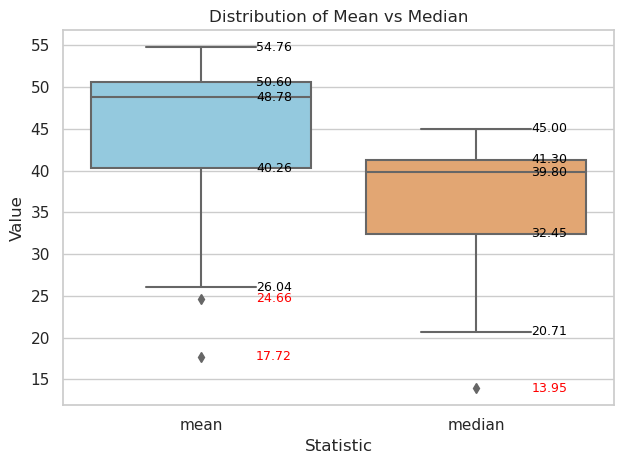

In [60]:
# Filter only mean and median columns
df_uk_mean_median = df_uk.filter(["mean", "median"])

# Set Seaborn style for white background + grid
sns.set_style("whitegrid")

# Create the boxplot
ax = sns.boxplot(data=df_uk_mean_median, palette=["skyblue", "sandybrown"])
plt.title("Distribution of Mean vs Median")

# Calculate quartiles, whiskers, and outliers
for i, col in enumerate(df_uk_mean_median.columns):
    q1 = df_uk_mean_median[col].quantile(0.25)
    q2 = df_uk_mean_median[col].quantile(0.50)
    q3 = df_uk_mean_median[col].quantile(0.75)
    iqr = q3 - q1

    # Whiskers (non-outlier min/max)
    lower_whisker = df_uk_mean_median[col][df_uk_mean_median[col] >= q1 - 1.5 * iqr].min()
    upper_whisker = df_uk_mean_median[col][df_uk_mean_median[col] <= q3 + 1.5 * iqr].max()

    # Outliers
    outliers = df_uk_mean_median[col][(df_uk_mean_median[col] < lower_whisker) | 
                                      (df_uk_mean_median[col] > upper_whisker)]

    # Annotate quartiles and whiskers
    ax.text(i + 0.2, q1, f"{q1:.2f}", va='center', fontsize=9, color='black')
    ax.text(i + 0.2, q2, f"{q2:.2f}", va='center', fontsize=9, color='black')
    ax.text(i + 0.2, q3, f"{q3:.2f}", va='center', fontsize=9, color='black')
    ax.text(i + 0.2, lower_whisker, f"{lower_whisker:.2f}", va='center', fontsize=9, color='black')
    ax.text(i + 0.2, upper_whisker, f"{upper_whisker:.2f}", va='center', fontsize=9, color='black')

    # Annotate outliers
    for out in outliers:
        ax.text(i + 0.2, out, f"{out:.2f}", va='center', fontsize=9, color='red')

plt.ylabel("Value")
plt.xlabel("Statistic")
plt.tight_layout()
plt.show()



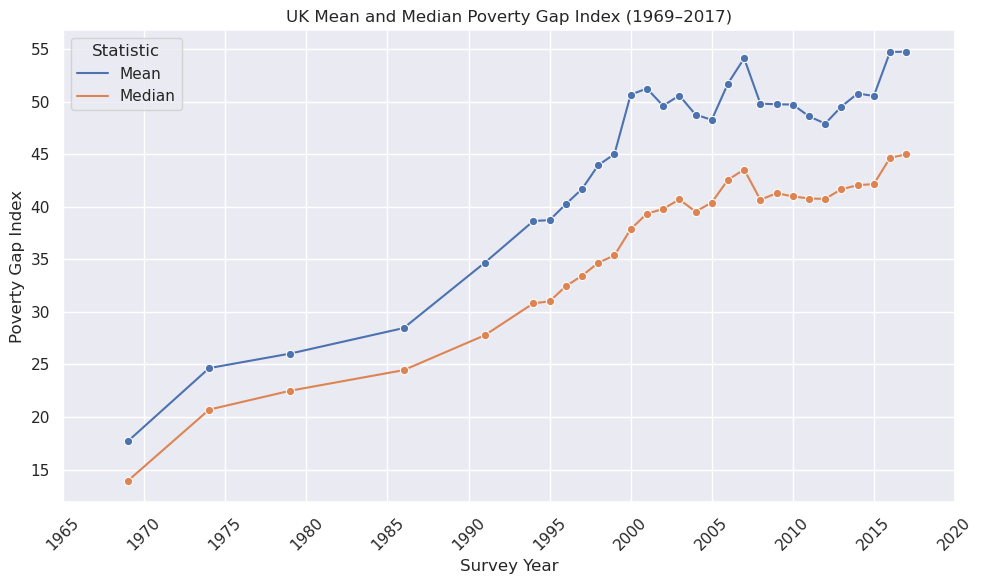

In [47]:
df_uk_mean_median = df_uk[["survey_year", "mean", "median"]]

# Melt and rename statistic labels
df_melted = df_uk_mean_median.melt(
    id_vars="survey_year",
    value_vars=["mean", "median"],
    var_name="statistic",
    value_name="value"
)
df_melted["statistic"] = df_melted["statistic"].replace({
    "mean": "Mean",
    "median": "Median"
    })
df_melted.rename(columns={"statistic": "Statistic"}, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x="survey_year", y="value", hue="Statistic", marker="o")

# Format x-axis
plt.xlim(1965, 2020)
plt.xticks(ticks=range(1965, 2021, 5), rotation=45)

# Labels and title
plt.title("UK Mean and Median Poverty Gap Index (1969–2017)")
plt.ylabel("Poverty Gap Index")
plt.xlabel("Survey Year")
plt.tight_layout()
plt.savefig(r"\Users\teres\OneDrive\The Code Institute\Individual Project\individual-project-teresa\Charts\"uk_mean_median_chart.png", dpi=300)
plt.show()




In [54]:
# Create the diff column if not already done
df_uk["diff"] = df_uk["mean"] - df_uk["median"]

# Sort by diff in descending order and round to 2 decimals
df_sorted = df_uk.sort_values(by="diff", ascending=False).round(2)

# Print selected columns
print(df_sorted[["survey_year", "mean", "median", "diff"]])




      survey_year   mean  median   diff
4724       2000.0  50.68   37.87  12.80
4725       2001.0  51.26   39.35  11.91
4731       2007.0  54.13   43.55  10.58
4740       2016.0  54.75   44.66  10.08
4727       2003.0  50.60   40.71   9.89
4726       2002.0  49.62   39.80   9.82
4741       2017.0  54.76   45.00   9.76
4723       1999.0  45.02   35.38   9.64
4722       1998.0  43.96   34.68   9.29
4728       2004.0  48.78   39.55   9.24
4730       2006.0  51.74   42.58   9.16
4732       2008.0  49.82   40.68   9.15
4734       2010.0  49.73   41.00   8.74
4738       2014.0  50.78   42.06   8.73
4733       2009.0  49.76   41.30   8.46
4739       2015.0  50.55   42.17   8.38
4721       1997.0  41.71   33.44   8.26
4729       2005.0  48.27   40.41   7.87
4737       2013.0  49.54   41.68   7.86
4718       1994.0  38.65   30.82   7.83
4735       2011.0  48.61   40.79   7.82
4720       1996.0  40.26   32.45   7.80
4719       1995.0  38.73   31.01   7.73
4736       2012.0  47.92   40.76   7.16
